In [23]:
import scraper
import os
from dotenv import load_dotenv
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [2]:
load_dotenv()
token = os.getenv("AITM_TOKEN")
len(token)

40

In [3]:
[scraper.query1, scraper.query2]

['oidc-client filename:package.json path:/ express filename:package.json',
 'openid-client filename:package.json path:/ express filename:package.json']

### Fetch repositories

In [ ]:
repos1 = scraper.find_repos_for(scraper.query1, token)

In [ ]:
repos2 = scraper.find_repos_for(scraper.query2, token)

In [ ]:
len(repos1) + len(repos2)

### Cache results

In [ ]:
interesting_repos = [file.repository for file in repos1 + repos2]

In [ ]:
scraper.store_repos(interesting_repos)

In [4]:
loaded_repos = scraper.load_repos()

In [5]:
loaded_repos

[Repository(full_name="DFE-Digital/login.dfe.examples.oidc-client"),
 Repository(full_name="philiplinell/oidc-client"),
 Repository(full_name="the-watchmen/node-oidc-proxy"),
 Repository(full_name="zapnito/oidc-client-js"),
 Repository(full_name="linz/oidc-client-js"),
 Repository(full_name="fmoraw/oicdjs"),
 Repository(full_name="IdentityModel/oidc-client-js"),
 Repository(full_name="moomoo-ya/oidc-client-sample"),
 Repository(full_name="smartworld-dm/oidc-client"),
 Repository(full_name="sknoslo/cypress-oidc-client"),
 Repository(full_name="Orthodox-Union/js-utils"),
 Repository(full_name="ComputerScienceHouse/Vote"),
 Repository(full_name="LykkeCorp/lykke.com"),
 Repository(full_name="medaminehamidi/portfolio"),
 Repository(full_name="onigra/vue-fes-japan-reject-con-demo"),
 Repository(full_name="nikolai-git-house/Reed-NextJs-frontend"),
 Repository(full_name="IAmAnubhavSaini/IdentityModel_oidc-client-js"),
 Repository(full_name="IAmAnubhavSaini/IdentityModel_oidc-client-js"),
 Repo

### Fetch authentication files from repositories

In [ ]:
# repos_to_auth_files = {repo.repository: scraper.find_auth_files(repo.repository) for repo in repos1}

In [ ]:
# repos_to_auth_files2 = {repo.repository: scraper.find_auth_files(repo.repository) for repo in repos2}

In [ ]:
repos_to_auth_files = {repo: scraper.find_auth_files(repo) for repo in loaded_repos}

In [ ]:
scraper.store_mappings(repos_to_auth_files)

In [6]:
loaded_mappings = scraper.load_mappings()

In [ ]:
# filtered_repos = dict(filter(lambda elem: elem[1] != None and len(elem[1]) > 0, list(repos_to_auth_files.items())))
# len(filtered_repos)

In [7]:
filtered_repos = dict(filter(lambda elem: elem[1] != None and len(elem[1]) > 0, list(loaded_mappings.items())))
len(filtered_repos)

71

In [8]:
flat_data = scraper.repo_auth_file_mapping_to_flat(filtered_repos)

In [9]:
df = pd.DataFrame.from_records(flat_data, columns=["repo", "file", "loc"])

In [12]:
df.describe()

,loc
count,173.000000
mean,99.277457
std,221.948725
min,2.000000
25%,19.000000
50%,35.000000
75%,90.000000
max,1744.000000


<AxesSubplot:>

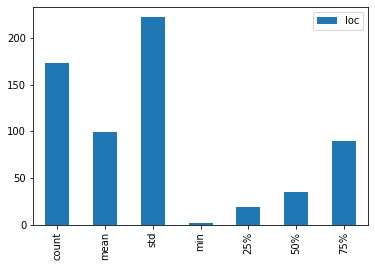

In [21]:
df.describe().drop('max', axis=0).plot(kind="bar")

In [24]:
df.head()

,repo,file,loc
0,https://github.com/philiplinell/oidc-client,https://github.com/philiplinell/oidc-client/blob/main/src/oidc/oidc.js,39
1,https://github.com/sknoslo/cypress-oidc-client,https://github.com/sknoslo/cypress-oidc-client/blob/master/oidc.js,177
2,https://github.com/LykkeCorp/lykke.com,https://github.com/LykkeCorp/lykke.com/blob/dev/authService.js,43
3,https://github.com/medaminehamidi/portfolio,https://github.com/medaminehamidi/portfolio/blob/main/auth.js,25
4,https://github.com/nikolai-git-house/Reed-NextJs-frontend,https://github.com/nikolai-git-house/Reed-NextJs-frontend/blob/master/server/middlewares/auth.js,8
